# Análise de desempenho - `semaphores`

## Importação das bibliotecas

In [1]:
import subprocess

import matplotlib.pyplot as plt
import pandas as pd

## Criação de DataFrame para os resultados

In [2]:
results_df = pd.DataFrame(columns=[
    "n",
    "p",
    "c",
    "elapsed",
    "mean_elapsed"
])

## Execução do programa `semaphores` para diferentes<br>parâmetros de $N$, $P$ e $C$

In [3]:
t = 10

try:
    for n in [1, 2, 4, 16, 32]:
        for p, c in [
            (1, 1),
            (1, 2),
            (1, 4),
            (1, 8),
            (2, 1),
            (4, 1),
            (8, 1)
        ]:
            command = subprocess.getoutput(
                f"./target/release/semaphores -n {n} -p {p} -c {c} -t {t}"
            )
            elapsed = [
                int(i)
                for i in command.splitlines()[-1][1:-1].replace(" ","").split(",")
            ]
            results_df = pd.concat([
                results_df,
                pd.DataFrame([{
                    "n": n,
                    "p": p,
                    "c": c,
                    "elapsed": elapsed,
                    "mean_elapsed": sum(elapsed)/len(elapsed)
                }])
            ])
except Exception:
    print("N:", n, "P:", p, "C:", c)
    print("-"*20)
    print(command)
    print("-"*20)

## Exportação dos resultados

In [4]:
results_df.to_csv("./results.csv", sep=";", index=False)

## Gráfico com resultados

In [5]:
def zero_padding(x):
    if x < 10:
        return f"0{x}"
    return str(x)

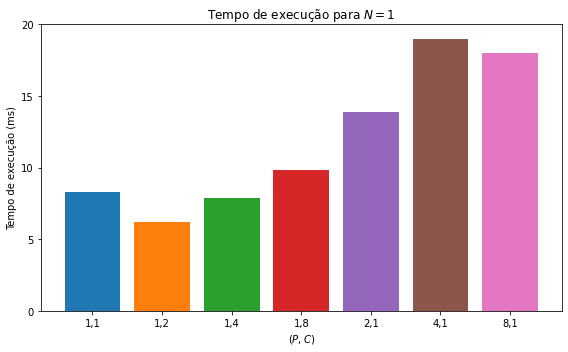

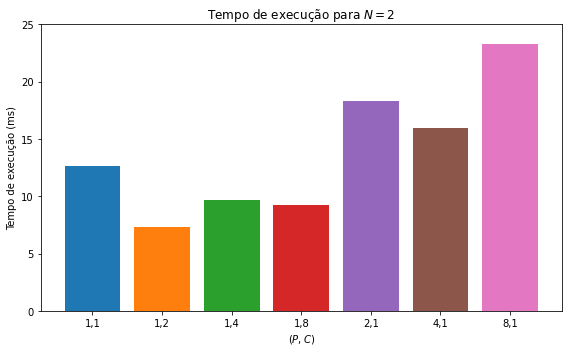

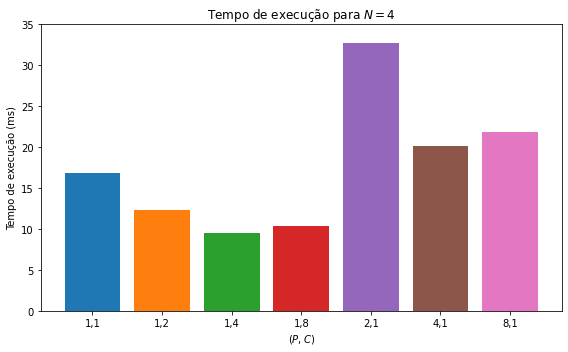

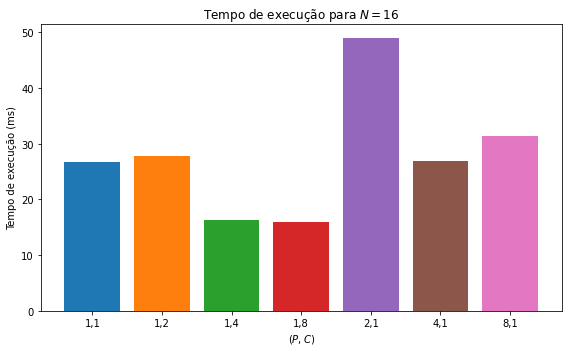

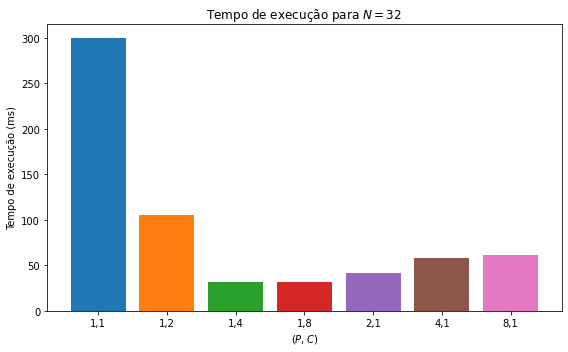

In [6]:
yticks = [
    [5*i for i in range(5)],
    [5*i for i in range(6)],
    [5*i for i in range(8)],
    [10*i for i in range(6)],
    [50*i for i in range(7)]    
]

xlist = sorted(results_df["n"].unique())
for i in range(len(xlist)):
    x = xlist[i]
    fig, ax = plt.subplots(1, figsize=(8,5))
    x_df = results_df.loc[results_df["n"] == x]
    for p, c in x_df[["p", "c"]].itertuples(False, None):
        pc_df = x_df.loc[(x_df["p"] == p) & (x_df["c"] == c)]
        ax.bar(f"{p},{c}", pc_df["mean_elapsed"].iloc[0], label=f"${x}$")
    ax.set_title(f"Tempo de execução para $N={x}$")
    ax.set_xlabel("$(P, C)$")
    ax.set_ylabel("Tempo de execução (ms)")
    ax.set_yticks(yticks[i])
    fig.tight_layout();
    plt.savefig(f"results_chart_{zero_padding(x)}.pdf", format="pdf", dpi=300);